# DATA DESCRIPTION

In [3]:
#ATTRIBUTES:
#Email: Email of the customer
#Address: Address of the customer
#Avatar: Avatar chosen by the customer
#Avg. Session Length: Average duration of the online session
#Time on App: Time spent on App
#Time on Website: Time spent on website
#Length of Membership: Time period of membership
#Yearly Amount Spent: Yearly amount spent by the customer


# Loading Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('Ecommerce.csv')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.shape   ##Rows, Columns

(500, 8)

In [9]:
df.dtypes ##Datatypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.describe().T ##Summary for Quantitative Variables

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [12]:
##Above we can see the summary that contains mean, count, min, max. etc. values from the quantitative variables

In [13]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [14]:
##We don't see any missing values in the data

In [15]:
df.describe(include=object).T ##Summary for Qualitative Variables

,count,unique,top,freq
Email,500,500,nhenry@hotmail.com,1
Address,500,500,"239 Bush Fall Apt. 906\nRiveraville, KY 88906-...",1
Avatar,500,138,Teal,7


In [16]:
for i in list(df.dtypes[df.dtypes==object].index):
    print(i,'\n\n',(df[i].value_counts()/df[i].shape[0])*100,'\n\n\n\n')

Email 

 nhenry@hotmail.com               0.2
garnerjustin@king.com            0.2
aaron04@yahoo.com                0.2
enash@gmail.com                  0.2
joshuaodom@gmail.com             0.2
                                ... 
fbryant@gmail.com                0.2
ebrown@osborne.com               0.2
jessica04@christian-riley.com    0.2
vmartin@yahoo.com                0.2
dbell@hotmail.com                0.2
Name: Email, Length: 500, dtype: float64 




Address 

 239 Bush Fall Apt. 906\nRiveraville, KY 88906-3319                 0.2
739 David Isle Suite 818\nChandlertown, DC 34587                   0.2
0360 Pearson Dam Suite 263\nLake Shawn, UT 65986-4190              0.2
14064 Frazier Hills Apt. 176\nAmyborough, MP 77858-0018            0.2
4547 Stafford Throughway Apt. 178\nNorth Patrick, MD 60768-4837    0.2
                                                                  ... 
229 Eric Mountains\nNew Caleb, PA 00396                            0.2
37216 Krista Drives\nWest Andr

In [17]:
##We see around 0.2% count of values in Email and Address, which shows that they are unique
##for Avatar, not all values are unique,and a few values are present as much as 1.4% in the data

In [18]:
##We see that address and email is unique for all the people, even though it is a qualitative variable
##Address and email won't really help us in predictions.
##Address, as a whole, could help in deciding which area has how much spending

##Avatar is a variable which has multiple counts for different people, so it looks like an important variable at the moment

In [19]:
for i in list(df.dtypes[df.dtypes==object].index):  ##Unique values in Categorical variables
    print(i,'\n\n',df[i].nunique(),'\n\n')

Email 

 500 


Address 

 500 


Avatar 

 138 




In [21]:
#Checking for null values
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [22]:
##No missing values

Avg. Session Length


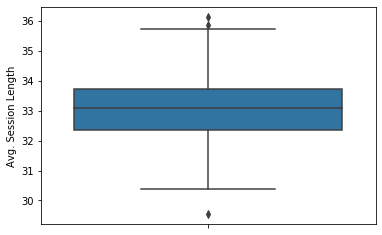

Time on App


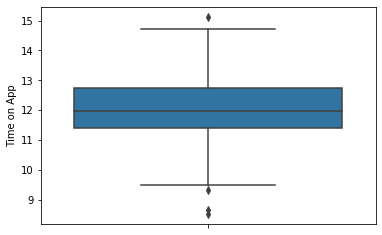

Time on Website


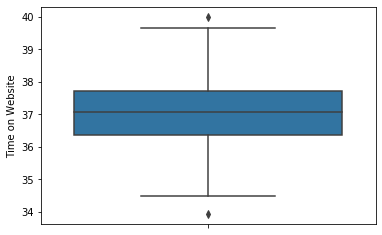

Length of Membership


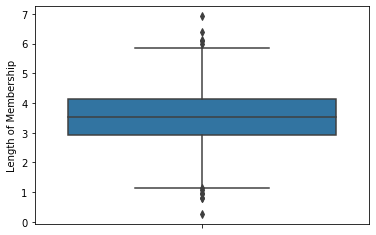

Yearly Amount Spent


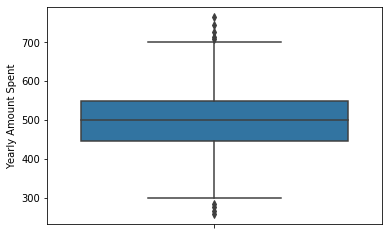

In [23]:
#Checking outliers

#For quantitative variables

for i in list(df.dtypes[df.dtypes!=object].index):
    print(i)
    sns.boxplot(data=df,x=i,orient='v')
    plt.show()

In [24]:
##Our target variable, that is , Yearly amount spend, has quite a few outliers but we need to consider the outliers
##for the independant variableS:
#for the independant variables, Length of Membership has a lot of outliers, and Avg. Session Length and Time on App. have few
#outliers. We might remove outliers from some of the independant variables, at a later stage in our analysis

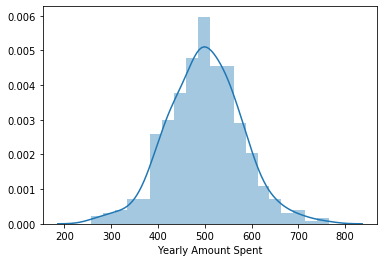

In [25]:
#Checking how the data is distributed:

##Let us check:
sns.distplot(df['Yearly Amount Spent'])
plt.show()

In [26]:
##Data ooks normally distributed. Let us check now:
#We will use the Jarque Bera test to check the normality of our target

#H0: Target normally distributed
#H1: Target not normally distributed
#Checking At 5% level of significance

from scipy import stats
print(stats.jarque_bera(df['Yearly Amount Spent']))

(4.269890272005706, 0.1182510779254693)


In [27]:
##So, the Pvalue in our case is 0.1182510779254693, which is more than 0.05 (Level of significance),and hence we will
#accept the null hypothesis, which states that Target is normally distributed

# Checking for Correlation among variables

In [30]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


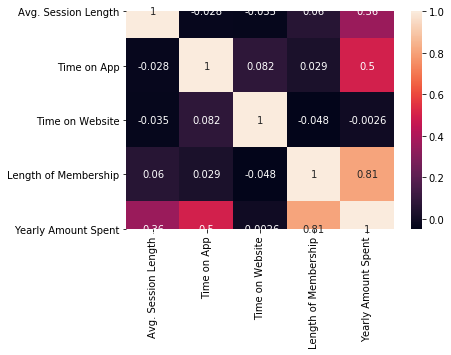

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
##We see that Length of Membership is highly correlated with the Target:Yearly Amount Spent(more than 0.5 value of correlation)
##Time on App's correlation with Target(Yearly Amount Spent) is 0.5(which is not very high, but still it should be kept in 
#check while building the model)

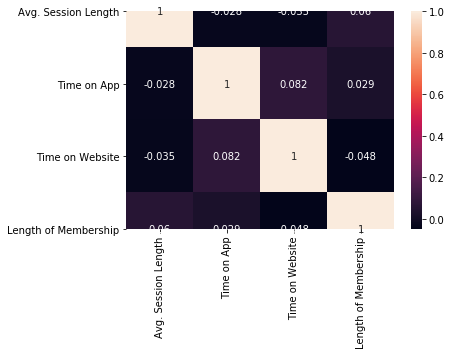

In [33]:
##As of now, we see that none of the independant variables are much correlated with each other. WE can check this using 
#as plot as well:
sns.heatmap(df.drop(columns='Yearly Amount Spent').corr(),annot=True)
plt.show()

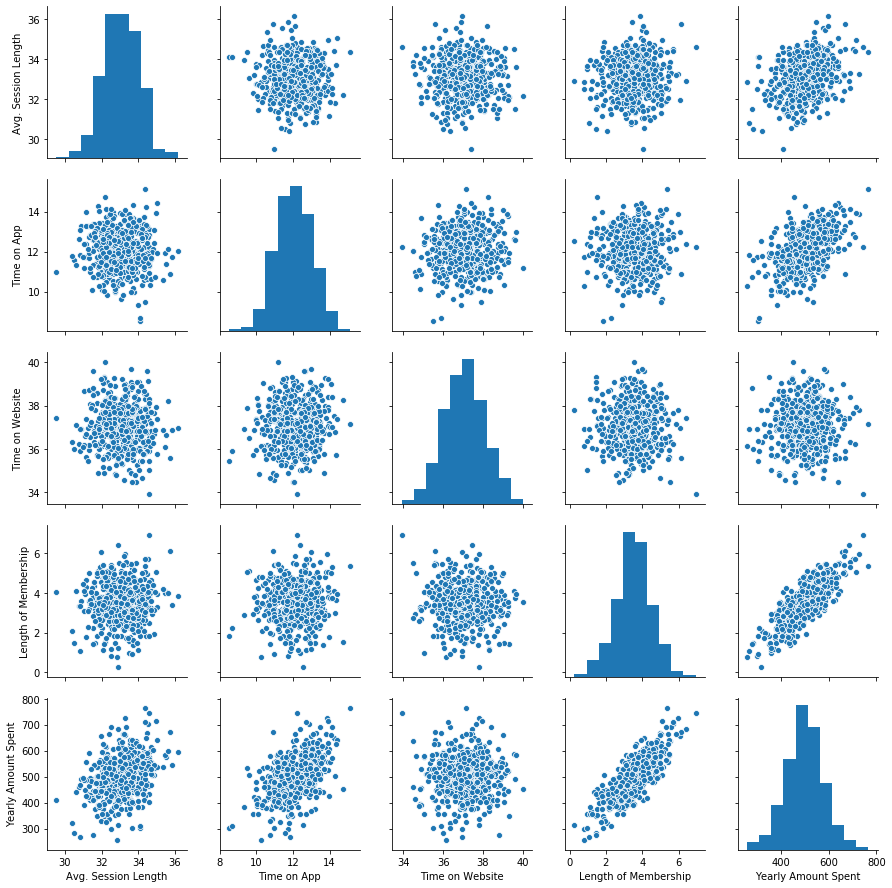

In [34]:
##We can clearly see here that the independant variables are not much correlated with each other.
#Let's check pairplot as well
sns.pairplot(data=df)
plt.show()

In [35]:
##Based on this analysis alone, I choose not to discard any variables at the moment. Yes, Length of memberships is
#highly correlated with the Yearly amount spent, but for time being, I will allow it in my model. Later, if needed,
#we can remove Length of Membership to check accuracy again. But for now, we'll continue with all variables.

#Of course, we will drop/modify certain categorical variables, which aren't seen here(seen the above shows only quantitative
#variables).

# Checking the relationship of Independant variables with the Target


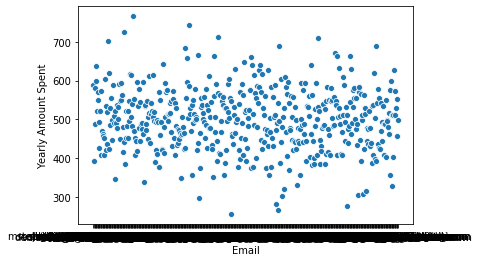

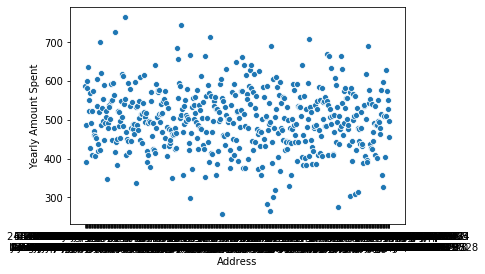

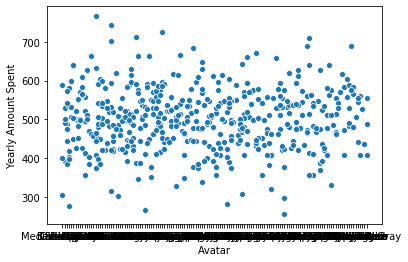

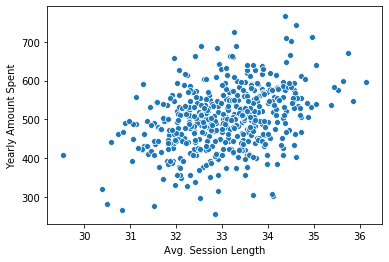

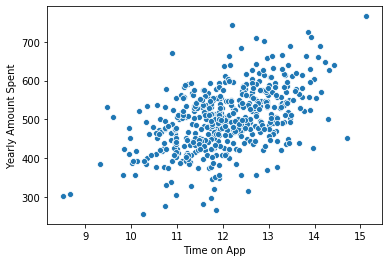

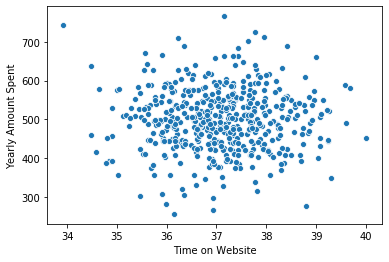

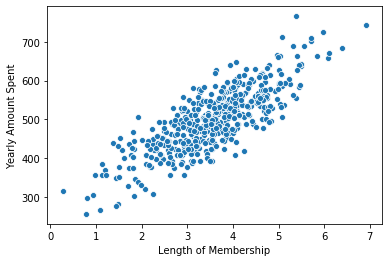

In [37]:
for i in df.drop(columns='Yearly Amount Spent').columns:
    sns.scatterplot(data=df,x=i,y='Yearly Amount Spent')
    plt.show()

In [38]:
## We can see that the relationships are not linear
#We can see that all the variables except Length of Membership, are evenly scattered, with Yearly Amount Spent, as the Target
##Even for Length of Membership, the relationship can't be called linear, but the correlation is very high

In [39]:
##Based on the above, we can later transform or combine features to extract more information out of them

In [40]:
##For example, we can see that graphs for email and Address look a bit similar, and that is because of the randomness of it
##We can transform Address in this case(to check for particular Areas)
#and we can actually drop Email, because it Email IDs #won't really help in predictions
##But, at the same time, we can also check the email provider and then maybe that can help us make predictions better
##Avatar can be used as it is for the time being, and later maybe we can combine it with Area where the person resides,
#or with some other variable, to extract the interaction of certain variables
#Average Session length, Time on App, and Time on Website can be used as it is, because they will act as good precitors,
#since they are not totally random, and at the same time they are not much correlated with the Target variable
##for now, we will use Length of Membership in our initial model, but later we can think of dropping it, since it is 
#highly correlated with the Target

In [41]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [42]:
##Transforming Email:
df['Email'] = df['Email'].apply(lambda d: d.split('@')[1])

In [43]:
df['Email'].value_counts()

hotmail.com          87
gmail.com            87
yahoo.com            76
barber.com            2
davis.com             2
                     ..
day.org               1
wagner-thomas.com     1
torres-miles.net      1
lee-wilson.com        1
rubio.com             1
Name: Email, Length: 244, dtype: int64

In [44]:
df['Area'] = df['Address'].apply(lambda d: d.split(',')[0])

In [45]:
df['Area'] = df['Area'].apply(lambda d: d.split('\n')[-1])

In [46]:
df['State'] = df['Address'].apply(lambda d: d.split(',')[-1][:3])

In [47]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Area,State
0,fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Wrightmouth,MI
1,hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Diazchester,CA
2,yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Cobbborough,DC
3,gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Port Jason,OH
4,davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Port Jacobville,PR


In [48]:
##Dropping Address: since we can already transformed features:
df = df.drop(columns='Address')

In [49]:
df.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Area,State
0,fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Wrightmouth,MI
1,hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Diazchester,CA
2,yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Cobbborough,DC
3,gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Port Jason,OH
4,davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Port Jacobville,PR


In [50]:
##Let us check quantitative summary again:
df.dtypes

Email                    object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
Area                     object
State                    object
dtype: object

In [51]:
df.describe(include=object)

,Email,Avatar,Area,State
count,500,500,500,500
unique,244,138,492,64
top,hotmail.com,Teal,South Jason,Uni
freq,87,7,2,17


In [52]:
##Checking value counts and scatterplot again:
for i in list(df.dtypes[df.dtypes==object].index):  ##Unique values in Categorical variables
    print(i,'\n\n',df[i].nunique(),'\n\n')

Email 

 244 


Avatar 

 138 


Area 

 492 


State 

 64 




In [53]:
for i in list(df.dtypes[df.dtypes==object].index):
    print(i,'\n\n',(df[i].value_counts()/df[i].shape[0])*100,'\n\n\n\n')

Email 

 hotmail.com          17.4
gmail.com            17.4
yahoo.com            15.2
barber.com            0.4
davis.com             0.4
                     ... 
day.org               0.2
wagner-thomas.com     0.2
torres-miles.net      0.2
lee-wilson.com        0.2
rubio.com             0.2
Name: Email, Length: 244, dtype: float64 




Avatar 

 Teal              1.4
CadetBlue         1.4
GreenYellow       1.4
SlateBlue         1.4
Cyan              1.4
                 ... 
Azure             0.2
PaleGoldenRod     0.2
CornflowerBlue    0.2
LawnGreen         0.2
PaleTurquoise     0.2
Name: Avatar, Length: 138, dtype: float64 




Area 

 South Jason           0.4
Ramirezberg           0.4
Anthonymouth          0.4
North Amanda          0.4
West Jessica          0.4
                     ... 
New Stephaniehaven    0.2
Johnsonhaven          0.2
Port Veronicaside     0.2
Howardhaven           0.2
West Laurieside       0.2
Name: Area, Length: 492, dtype: float64 




State 

 Uni    3.4
 

In [54]:
##count of values in categorical columns:
for i in list(df.dtypes[df.dtypes==object].index):
    print(i,'\n\n',(df[i].value_counts()),'\n\n\n\n')

Email 

 hotmail.com          87
gmail.com            87
yahoo.com            76
barber.com            2
davis.com             2
                     ..
day.org               1
wagner-thomas.com     1
torres-miles.net      1
lee-wilson.com        1
rubio.com             1
Name: Email, Length: 244, dtype: int64 




Avatar 

 Teal              7
CadetBlue         7
GreenYellow       7
SlateBlue         7
Cyan              7
                 ..
Azure             1
PaleGoldenRod     1
CornflowerBlue    1
LawnGreen         1
PaleTurquoise     1
Name: Avatar, Length: 138, dtype: int64 




Area 

 South Jason           2
Ramirezberg           2
Anthonymouth          2
North Amanda          2
West Jessica          2
                     ..
New Stephaniehaven    1
Johnsonhaven          1
Port Veronicaside     1
Howardhaven           1
West Laurieside       1
Name: Area, Length: 492, dtype: int64 




State 

 Uni    17
 Bo    16
 DE    13
 MO    13
 SC    13
       ..
 WI     5
 CO     5
 WA 

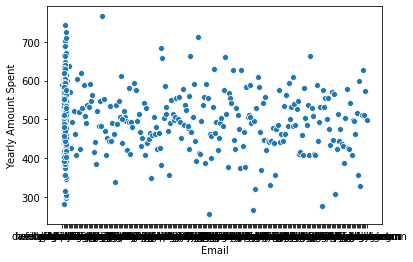

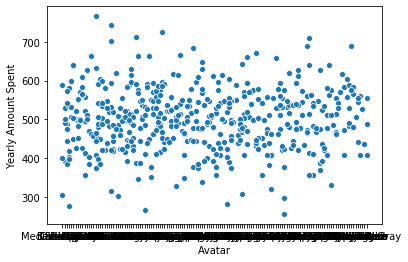

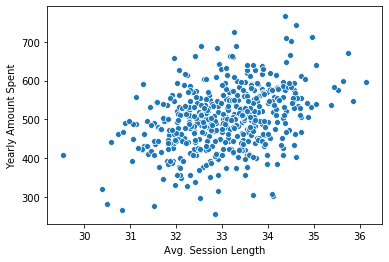

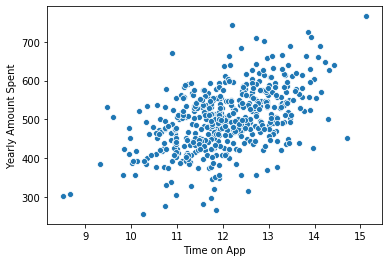

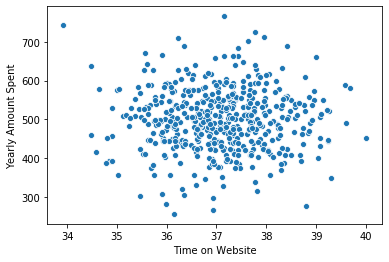

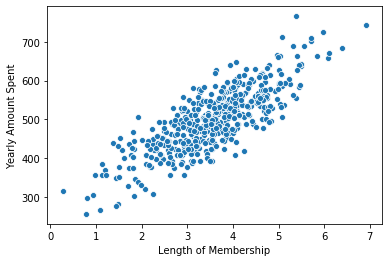

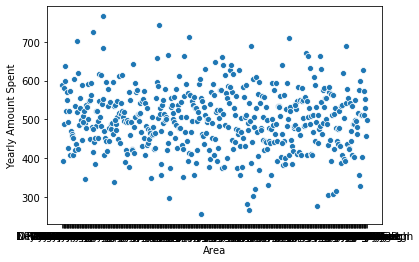

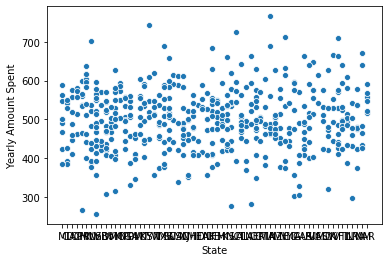

In [55]:
for i in df.drop(columns='Yearly Amount Spent').columns:
    sns.scatterplot(data=df,x=i,y='Yearly Amount Spent')
    plt.show()

In [56]:
##We see that the ditribution for email has changed a lot, but for the Area and the State it remains almost similar to
#what it was for the Address

In [57]:
df.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Area,State
0,fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,Wrightmouth,MI
1,hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Diazchester,CA
2,yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,Cobbborough,DC
3,gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Port Jason,OH
4,davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Port Jacobville,PR


In [58]:
##For modelling, we will have to encode(get dummies) for Email, Avatar, Area, and State:

pd.get_dummies(data=df,columns=['Email','Avatar','Area','State'],drop_first=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_alvarez-cline.info,Email_anderson-avery.com,Email_anderson.com,Email_anderson.org,Email_anthony.com,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,37.190268,3.576526,529.049004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,38.332576,4.958264,551.620145,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,36.840086,2.336485,456.469510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df['State'].unique()

array([' MI', ' CA', ' DC', ' OH', ' PR', ' MN', ' WV', 'Uni', ' SD',
       ' Bo', ' WY', ' MO', ' MP', ' ND', ' GA', ' PW', ' MT', ' KY',
       'USN', ' VI', ' TX', ' MS', ' SC', ' WA', 'USC', ' NJ', ' NH',
       ' ME', ' ID', ' TN', ' AK', ' DE', ' FM', ' HI', ' KS', ' NC',
       ' UT', ' AL', ' LA', ' NE', ' OR', ' CT', ' MA', ' IN', ' AZ',
       ' MH', ' NY', ' CO', ' IA', ' GU', ' AS', ' RI', ' VA', 'USS',
       ' MD', ' OK', ' WI', ' VT', ' FL', ' IL', ' NV', ' PA', ' NM',
       ' AR'], dtype=object)

In [60]:
##Above we can see that Uni, USN, Bo and USS don't really seem like States, but since we have converted our data which will
#be used for train and test, our predictions won't be biased

In [61]:
df['Email'].unique()

array(['fernandez.com', 'hotmail.com', 'yahoo.com', 'gmail.com',
       'davidson-herman.com', 'lucas.biz', 'walter-martinez.com',
       'lin.biz', 'peterson.com', 'freeman.biz', 'anderson.com',
       'hale-bauer.biz', 'love-west.net', 'hernandez-townsend.com',
       'mcconnell.com', 'schaefer-carr.net', 'martinez.info',
       'page-fleming.com', 'lee-wilson.com', 'bailey-gordon.net',
       'hill-leach.info', 'little.org', 'elliott.com', 'dorsey.net',
       'chung.com', 'garcia-nelson.biz', 'maldonado-gonzalez.net',
       'west.info', 'mcgee.com', 'fowler.info', 'martin-morgan.com',
       'ryan.biz', 'diaz.org', 'contreras.info', 'burgess.com',
       'anthony.com', 'hicks-smith.com', 'peterson-yates.com',
       'ferguson.info', 'richards.com', 'saunders.info', 'ramos.com',
       'murphy-harris.info', 'boyer-pratt.com', 'jones.info',
       'wagner-thomas.com', 'briggs.com', 'rosales.com', 'davis.com',
       'ryan.info', 'munoz.com', 'mcdonald-smith.biz',
       'sanchez-vel

In [62]:
df['Area'].unique()

array(['Wrightmouth', 'Diazchester', 'Cobbborough', 'Port Jason',
       'Port Jacobville', 'Jeffreychester', 'Josephbury',
       'DPO AP 09026-4941', 'West Debra', 'PSC 2734', 'Alexandriaport',
       'DPO AA 07580-2652', 'Lake Shanestad', 'New Stephaniehaven',
       'Samanthaland', 'Phillipstad', 'Johnsonfurt', 'Wilsonton',
       'Port Dannytown', 'North Johnview', 'North Teresa', 'PSC 2490',
       'PSC 5723', 'FPO AA 85439-9449', 'Nicholsbury', 'Glassport',
       'Hancockchester', 'Port Kaitlin', 'Youngberg', 'East Crystalview',
       'Meyerstown', 'Chandlertown', 'FPO AA 26496', 'East Audrey',
       'Ramirezberg', 'New Mariahaven', 'East Amanda', 'East Amberhaven',
       'Beasleyburgh', 'Malloryland', 'Lake Jack', 'Brandishire',
       'North Matthewmouth', 'Marciashire', 'FPO AE 32122-5711',
       'New Ashleyfort', 'Thomasmouth', 'Kleinburgh', 'Romerofurt',
       'West Jessica', 'Samanthatown', 'Williamview', 'North Miguel',
       'Lake Stevenchester', 'PSC 4508', 'Port

In [63]:
##We see that Area unique is also having certain Postal codes, which is not ideally desired, but of course, since we
#have converted the data for both train and test, our predictions won't be biased

In [64]:
##So, for now, we can actually Drop Email and Area, since they are extremely random and contain too many unique values
## we will still be using State as an independant variable, and later if we find it is not useful, we can drop it as well

In [65]:
df = df.drop(columns=['Area','Email'])

In [66]:
df2 = pd.get_dummies(data=df,columns=['Avatar','State'],drop_first=True)

In [67]:
df2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training the Model

In [69]:
y = df2['Yearly Amount Spent']
X = df2.drop(columns='Yearly Amount Spent')

In [70]:
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 205)
(150, 205)
(350,)
(150,)


In [73]:
##Checking if both train and test representative of the overall data

In [74]:
X.describe()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.0,33.053194,12.052488,37.060445,3.533462,0.010000,0.012000,0.006000,0.002000,0.006000,...,0.012000,0.024000,0.008000,0.010000,0.018000,0.014000,0.010000,0.012000,0.004000,0.034000
std,0.0,0.992563,0.994216,1.010489,0.999278,0.099598,0.108994,0.077304,0.044721,0.077304,...,0.108994,0.153202,0.089173,0.099598,0.133084,0.117608,0.099598,0.108994,0.063182,0.181411
min,1.0,29.532429,8.508152,33.913847,0.269901,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,32.341822,11.388153,36.349257,2.930450,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,33.082008,11.983231,37.069367,3.533975,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,33.711985,12.753850,37.716432,4.126502,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,36.139662,15.126994,40.005182,6.922689,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X_train.describe()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
count,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.0000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.0,33.034924,12.066403,37.073039,3.568201,0.008571,0.008571,0.008571,0.0,0.005714,...,0.014286,0.028571,0.011429,0.014286,0.0200,0.011429,0.011429,0.011429,0.005714,0.028571
std,0.0,0.936268,0.995346,1.030079,0.993653,0.092316,0.092316,0.092316,0.0,0.075485,...,0.118836,0.166837,0.106444,0.118836,0.1402,0.106444,0.106444,0.106444,0.075485,0.166837
min,1.0,30.393185,8.508152,34.574028,0.269901,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,32.354389,11.412673,36.322519,3.004770,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,33.062852,12.023527,37.070353,3.565131,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,33.671222,12.731589,37.734990,4.131098,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,35.742670,14.715388,40.005182,6.401229,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
X_test.describe()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
count,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,...,150.000000,150.000000,150.0,150.0,150.000000,150.000000,150.000000,150.000000,150.0,150.000000
mean,1.0,33.095821,12.020020,37.031061,3.452403,0.013333,0.020000,0.0,0.006667,0.006667,...,0.006667,0.013333,0.0,0.0,0.013333,0.020000,0.006667,0.013333,0.0,0.046667
std,0.0,1.115129,0.994139,0.965953,1.010971,0.115082,0.140469,0.0,0.081650,0.081650,...,0.081650,0.115082,0.0,0.0,0.115082,0.140469,0.081650,0.115082,0.0,0.211631
min,1.0,29.532429,9.316289,33.913847,0.801516,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.0,32.312760,11.373347,36.502652,2.845564,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.0,33.137827,11.944758,37.058002,3.449741,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.0,33.869076,12.778302,37.688222,4.080929,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.0,36.139662,15.126994,39.252931,6.922689,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [77]:
##We can see that the mean data from X, X_test and X_train resemble each other(means are close by to each other, for
#every independant variable,and hence we can claim that train and test are represetative of overall data)

436.515606    0.002
547.125932    0.002
469.310861    0.002
489.812488    0.002
506.423860    0.002
              ...  
503.217393    0.002
347.776927    0.002
540.995739    0.002
409.094526    0.002
610.128033    0.002
Name: Yearly Amount Spent, Length: 500, dtype: float64


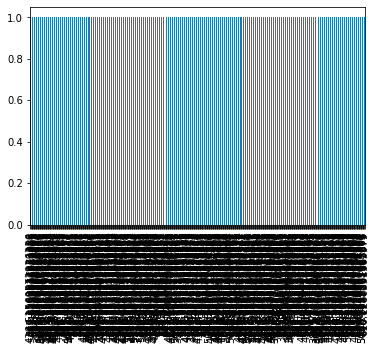

461.790959    0.002857
479.247417    0.002857
434.144202    0.002857
495.175950    0.002857
393.857371    0.002857
                ...   
528.309225    0.002857
495.299443    0.002857
583.079636    0.002857
467.800924    0.002857
610.128033    0.002857
Name: Yearly Amount Spent, Length: 350, dtype: float64


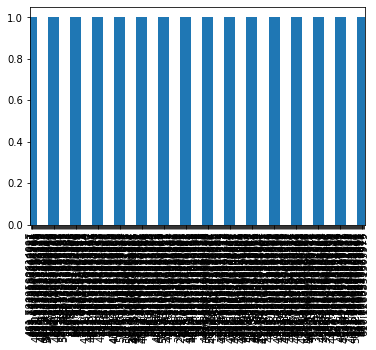

616.851523    0.006667
628.047804    0.006667
502.092528    0.006667
478.262126    0.006667
408.640351    0.006667
                ...   
407.804031    0.006667
385.152338    0.006667
445.062186    0.006667
496.554082    0.006667
576.025244    0.006667
Name: Yearly Amount Spent, Length: 150, dtype: float64


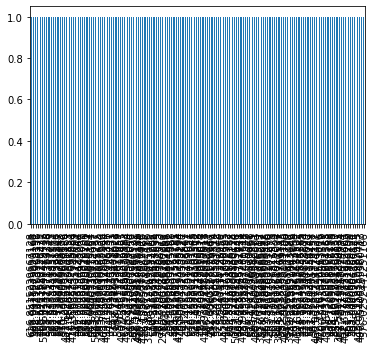

In [78]:
##We can do the same for the target by doing the count
print(y.value_counts(normalize=True))
y.value_counts().plot.bar()
plt.show()
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.bar()
plt.show()
print(y_test.value_counts(normalize=True))
y_test.value_counts().plot.bar()
plt.show()

In [79]:
##We can see that the train and test data fairly represent the overall data, through the plots

In [80]:
#We can also do a ttest for the target:

In [81]:
from scipy.stats import ttest_1samp

In [82]:
#ttest_1samp(sample,pop_mean)

In [83]:
ttest_1samp(y_train,y.mean())

Ttest_1sampResult(statistic=0.5437325816011879, pvalue=0.5869726656282761)

In [84]:
ttest_1samp(y_test,y.mean())

Ttest_1sampResult(statistic=-0.8283025501856158, pvalue=0.40882397241727664)

In [85]:
print('Mean is %2.1f Sd is %2.1f' % (y.mean(),np.std(y,ddof = 1)))

Mean is 499.3 Sd is 79.3


In [86]:
#PValue is greater than significance level-0.05 so accept null hypothesis, which means that train data
#and test data does represent the population

# Base Model

In [88]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.991
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     154.4
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):          2.53e-229
Time:                         13:00:14   Log-Likelihood:                -1725.6
No. Observations:                  500   AIC:                             3861.
Df Residuals:                      295   BIC:                             4725.
Df Model:                          204                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1044.4508     30.028    -34.782      0.000   -1103.548    -985.354
Avg. Session Length            25.6627      0.587     43.728      0.000      24.508      26.818
Time on App                    38.5954      0.583     66.154      0.000      37.447      39.744
Time on Website                 0.2996      0.556      0.539      0.590      -0.795       1.394
Length of Membership           61.3475      0.578    106.129      0.000      60.210      62.485
Avatar_AntiqueWhite             4.2794      9.304      0.460      0.646     -14.031      22.590
Avatar_Aqua                    -6.2546      8.996     -0.695      0.487     -23.959      11.450
Avatar_Aquamarine              -5.1203     10.170     -0.503      0.615     -25.134      14.894
Avatar_Azure                   -3.2721     13.288     -0.246      0.806     -29.423      22.878
Avatar_Beige                   -6.5670     10.043     -0.654      0.514     -26.332      13.198
Avatar_Bisque                  -6.6496      8.897     -0.747      0.455     -24.160      10.861
Avatar_Black                    3.2530     11.016      0.295      0.768     -18.426      24.932
Avatar_BlanchedAlmond           1.4635      9.245      0.158      0.874     -16.731      19.658
Avatar_Blue                     4.2222      9.528      0.443      0.658     -14.528      22.973
Avatar_BlueViolet              -2.2152      9.038     -0.245      0.807     -20.001      15.571
Avatar_Brown                   -2.4752      9.266     -0.267      0.790     -20.711      15.761
Avatar_BurlyWood               -4.0832     10.113     -0.404      0.687     -23.986      15.819
Avatar_CadetBlue               -6.0615      8.887     -0.682      0.496     -23.551      11.428
Avatar_Chartreuse             -11.4856     11.460     -1.002      0.317     -34.040      11.068
Avatar_Chocolate                4.7788      9.488      0.504      0.615     -13.894      23.451
Avatar_Coral                   -3.9381     13.340     -0.295      0.768     -30.193      22.317
Avatar_CornflowerBlue          -0.0821     13.597     -0.006      0.995     -26.842      26.678
Avatar_Cornsilk                -3.9621      9.623     -0.412      0.681     -22.901      14.977
Avatar_Crimson                  2.2265      9.221      0.241      0.809     -15.920      20.373
Avatar_Cyan                    -2.5840      8.893     -0.291      0.772     -20.085      14.917
Avatar_DarkBlue                 6.4336     10.174      0.632      0.528     -13.590      26.457
Avatar_DarkCyan                -7.4685      9.585     -0.779      0.437     -26.332      11.396
Avatar_DarkGoldenRod           -0.5682      9.093     -0.062      0.950     -18.464      17.328
Avatar_DarkGray                 3.1729     11.204      0.283      0.777     -18.878      25.224


In [89]:
##Checking the assumptions before Proceeding:

In [90]:
#Checking normailty of residuals

In [91]:
residuals = model1.resid

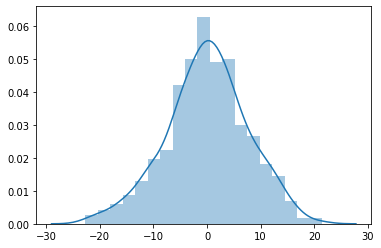

In [92]:
sns.distplot(residuals)

In [93]:
#Check linearity of residuals

Text(0.5, 1.0, 'Probability plot')

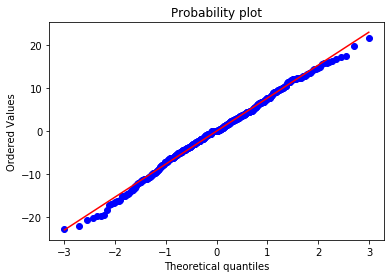

In [94]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
stats.probplot(residuals,dist='norm',plot=pylab)
plt.title('Probability plot')

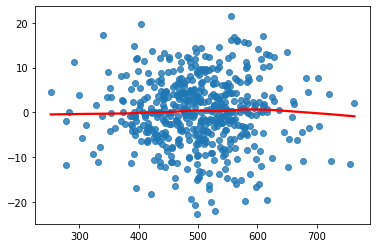

In [95]:
#Checking Heteroscedacity

y_pred = model1.predict(X)

sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.show()

In [96]:
#Shows homoscedacity

In [97]:
#Test-Goldfeld for Checking Homoscedacity

import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(y=model1.resid,x=X)
test

(1.0144767108589356, 0.47550842560097406, 'increasing')

In [98]:
#Null accepted as pvalue greater than 0.05. Which means that homoscedacity exists in the data

In [99]:
#a. What is the overall R2? Please comment on whether it is good or not.
##overall R2 is 0.991 and Adjusted R2 is 0.984, which shows that there are certain variables which might be leading to
#overfitting.
##Also, the warnings show that a strong multi-collinearity does exist
#From the above model, we can see the separate Pvalues of the variables, which shows that the variables coming from 
#States and Avatar are not significant as their Pvalues are much greater than 0.05

# Predictions

In [100]:

ypred1 = model1.predict(X_test)
ypred1

90     436.830855
254    476.812831
283    374.203279
445    517.594422
461    504.529359
          ...    
4      583.939487
318    567.699095
331    523.157810
245    396.977549
5      636.669015
Length: 150, dtype: float64

In [101]:
X_test

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
90,1.0,32.491447,12.530357,37.875219,2.476139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,1.0,32.711119,12.326291,36.673878,3.350279,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
283,1.0,33.077731,11.466984,35.675728,1.809230,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,1.0,32.212924,11.732991,35.633954,4.331863,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,1.0,32.770492,11.371767,35.261498,4.034386,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.0,33.330673,12.795189,37.536653,4.446308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,1.0,33.531860,13.665770,36.900221,3.515688,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,1.0,32.274594,12.954811,37.108816,3.689917,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
245,1.0,32.980029,11.201160,37.689337,2.412831,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_test['Predicted Values'] = ypred1

In [103]:
X_test.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni,Predicted Values
90,1.0,32.491447,12.530357,37.875219,2.476139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,436.830855
254,1.0,32.711119,12.326291,36.673878,3.350279,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,476.812831
283,1.0,33.077731,11.466984,35.675728,1.809230,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,374.203279
445,1.0,32.212924,11.732991,35.633954,4.331863,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,517.594422
461,1.0,32.770492,11.371767,35.261498,4.034386,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,504.529359


# What are the significant variables?

In [104]:
#From the above model, we see that Average Session Length, Time on App, Length of Membership are the most significant
#variables, since their Pvalues are much lesser than the level of significance i.e. 0.05.
##Almost all the States and the Avatars are insignificant variables as per the above model

# Do you see multi-collinearity?

In [105]:
##Yes, multi-collinearity does exist, as we can see from the above model summary, and we can check it as well, using the
#Variance Inflation factor:

#Checking multicollearity using Heatmap and VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).sort_values(by='vif',ascending=False)

,vif
const,4567.118801
Avatar_SlateBlue,5.625041
Avatar_GreenYellow,5.609198
Avatar_Cyan,5.528957
Avatar_CadetBlue,5.521435
...,...
Avatar_NavajoWhite,1.735625
Avg. Session Length,1.715189
Time on App,1.700712
Length of Membership,1.686582


In [106]:
##Generally we will remove variables with VIF>4   (Except the constant: constant is not a variable, so we don't need to see the
#VIF for the constant)
##We will remove highly collinear variables for our next model

# Evaluation Metrics: RMSE (Root Mean Square Error), MAE(Mean Absolute Error)

In [109]:
#Root Mean Square Error
##RMSE for test:
ypred1 = model1.predict(X_test.drop(columns='Predicted Values'))
np.sqrt(metrics.mean_squared_error(ypred1,y_test))

7.957605032987349

In [110]:
##RMSE for train:
ypred2 = model1.predict(X_train)
np.sqrt(metrics.mean_squared_error(ypred2,y_train))

7.487717775093641

In [111]:
##We see that the RMSE for test is just a bit above that of Train

In [112]:
##Mean absolute error:
#For test:
metrics.mean_absolute_error(y_test,ypred1)

6.087933982067717

In [113]:
#For test:
metrics.mean_absolute_error(y_train,ypred2)

5.883949788585204

In [114]:
##For Mean Absolute Error, we see that it is again a bit higher for Test when compared to Train

In [115]:
##MAPE: Mean Absolute Percentage Error:
##For test:
np.mean(abs(((ypred1 - y_test)/y_test)*100))

1.2417557604797191

In [116]:
##For test:
np.mean(abs(((ypred2 - y_train)/y_train)*100))

1.1979335161024884

In [117]:
##For Mean Absolute Percentage Error, we see that it is again a bit higher for Test when compared to Train

# Journey Towards Improving the Model Accuracy


In [120]:
import statsmodels.api as sm
def model(df):
    y = df['Yearly Amount Spent']
    x = df.drop(columns='Yearly Amount Spent')
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model1 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model1.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model1.rsquared
    r2_adjtrain = model1.rsquared_adj
    model2 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model2.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model2.rsquared
    r2_adjtest = model2.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Shape','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
model(df2)

,Train,Test
Dataset_Shape,"(350, 205)","(150, 205)"
RMSE,6.32386,1.19831
Rsquared,0.993615,0.999771
RSquared-Adjusted,0.985339,0.982946


In [121]:
##Above, we see the full model based on all the variables.
##Now, we will use remove certain variables using VIF

In [122]:
# removing collinear variables using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [123]:
out1 = calculate_vif(X)

Iteration no.
1
[4567.118800732254, 1.7151891666844812, 1.7007115142292322, 1.5954107769021548, 1.6865822597908946, 4.340485740564353, 4.8596207091323524, 3.1240247146163767, 1.784978827395256, 3.046913368024067, 4.753747300707536, 2.448567030491251, 4.28583663373845, 3.6487136978337475, 4.904711477978194, 4.305361128625339, 3.08932125542987, 5.521435231721961, 2.6501701369292983, 3.6184254278434898, 1.7992064899920202, 1.8691530538222993, 3.7224759516530255, 4.263304627845192, 5.528957103373481, 3.126905018058641, 3.6929943820752897, 4.96533830121639, 2.533216382589047, 4.390392147377665, 3.6893992668594477, 4.370347839641936, 3.0832296990038697, 3.011759446630163, 3.0151781208496304, 3.0162678849728657, 2.468573578914089, 4.5489064792333656, 3.0898657572214496, 2.4006347342201075, 3.2467104234167024, 4.997433468742383, 4.972051750775262, 1.8656617967846323, 3.7112175751109144, 3.1002542685488508, 2.395524163252306, 3.6709839036163134, 2.4729701127164905, 2.5167123101066027, 3.7436946

Iteration no.
4
[164.80753462914421, 21.944316486106192, 2.7818669944841434, 3.21132873834237, 2.2331375156575253, 1.4771423781299424, 2.20266914115817, 3.2035360641728388, 1.9304073384508809, 2.8423373479613487, 2.4614911379561852, 3.347012521458362, 3.0967120744962267, 2.222681271410282, 3.615313722417633, 2.1483296606306106, 2.3431389199051975, 1.5743054414345838, 1.5843058168101924, 2.47892478218487, 2.403855811440488, 3.660343375424262, 2.1866738101829064, 2.566849540746897, 3.5187522525375066, 2.0618121612877207, 3.1329449342442324, 2.55263876157132, 3.0947000119398442, 2.145371224155937, 2.0962086626985883, 2.151732212576769, 2.134893081368063, 1.8995107411286756, 2.813919304140613, 1.924062755056346, 1.949041657801612, 2.448982697414055, 3.185439858270521, 3.324694459150594, 1.6008067624534021, 2.578001986996787, 2.3042292149047174, 1.8257152501821217, 2.640097400988499, 1.8616517920063822, 2.0260009140203215, 2.7497016256019235, 3.063602837104397, 2.629898933764223, 1.85049943

In [124]:
## The following includes only the relevant features for creating our new model with selected variables after removing
#multi-collinearity:  The variables below don't seem important one, and hence there is a possibilty that this model won't be
#useful to us
out1.head()

,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,Avatar_Bisque,Avatar_Black,Avatar_BlanchedAlmond,Avatar_Blue,Avatar_BlueViolet,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
##Let's create a model using out1:

import statsmodels.api as sm
def model(df):
    y = df['Yearly Amount Spent']
    x = out1
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model1 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model1.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model1.rsquared
    r2_adjtrain = model1.rsquared_adj
    model2 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model2.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model2.rsquared
    r2_adjtest = model2.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Shape','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
model(df2)

,Train,Test
Dataset_Shape,"(350, 201)","(150, 201)"
RMSE,51.8708,12.6274
Rsquared,0.570387,0.974581
RSquared-Adjusted,0.0388797,0.368772


In [126]:
##As guessed, we see that this model did not perform well. Let's try some other technique
#We see that our training data and testing data have performed badly in this case, and that is majorly because the VIF selection
#method could not work in this case. We can try removing the variables manually
#or else, in our first model, where we saw that variables related to States and Avatars weren't really significant.
#so, we can try dropping them or else creating polynomial features

In [127]:
##So, mostly in our first model, we are seeing a case of Overfitting, which can be removed. Let's try:

In [128]:
df2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using VIF to eliminate features

In [129]:
pd.DataFrame({'vif': vif}, index=X.columns).sort_values(by='vif',ascending=False)

,vif
const,4567.118801
Avatar_SlateBlue,5.625041
Avatar_GreenYellow,5.609198
Avatar_Cyan,5.528957
Avatar_CadetBlue,5.521435
...,...
Avatar_NavajoWhite,1.735625
Avg. Session Length,1.715189
Time on App,1.700712
Length of Membership,1.686582


In [130]:
##We can try removing the highest VIF variable first:

In [131]:
X = X.drop(columns='Avatar_SlateBlue')

In [132]:
X

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,1.0,34.497268,12.655651,39.577668,4.082621,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,31.926272,11.109461,37.268959,2.664034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,33.000915,11.330278,37.110597,4.104543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,34.305557,13.717514,36.721283,3.120179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,33.330673,12.795189,37.536653,4.446308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,1.0,34.702529,11.695736,37.190268,3.576526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,1.0,32.646777,11.499409,38.332576,4.958264,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,1.0,33.322501,12.391423,36.840086,2.336485,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).sort_values(by='vif',ascending=False)

,vif
const,4335.854130
State_ Bo,4.412292
State_Uni,4.368628
State_ VT,3.923520
State_ SC,3.910075
...,...
Avatar_PowderBlue,1.291940
Avatar_LightGoldenRodYellow,1.290922
Avatar_PaleGoldenRod,1.289507
Avatar_PaleTurquoise,1.253424


In [134]:
##We can try removing State_Bo now:
X = X.drop(columns='State_ Bo')
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).sort_values(by='vif',ascending=False)

,vif
const,4250.077731
State_ VT,2.340397
State_ SC,2.295988
State_ MN,2.271669
State_ FM,2.262258
...,...
Avatar_PowderBlue,1.291924
Avatar_LightGoldenRodYellow,1.290904
Avatar_PaleGoldenRod,1.289444
Avatar_PaleTurquoise,1.253095


In [135]:
##Now, the VIF for most variables is less than 4, so let's try building a model now:

In [136]:
X.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,1.0,34.497268,12.655651,39.577668,4.082621,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,31.926272,11.109461,37.268959,2.664034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,33.000915,11.330278,37.110597,4.104543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,34.305557,13.717514,36.721283,3.120179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,33.330673,12.795189,37.536653,4.446308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
selected = X

In [138]:
##Let's create a model:

import statsmodels.api as sm
def model(df):
    y = df['Yearly Amount Spent']
    x = selected
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model1 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model1.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model1.rsquared
    r2_adjtrain = model1.rsquared_adj
    model2 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model2.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model2.rsquared
    r2_adjtest = model2.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Shape','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
model(df2)

,Train,Test
Dataset_Shape,"(350, 203)","(150, 203)"
RMSE,6.38592,1.19831
Rsquared,0.993489,0.999771
RSquared-Adjusted,0.985244,0.982946


In [139]:
selected.head()

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,1.0,34.497268,12.655651,39.577668,4.082621,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,31.926272,11.109461,37.268959,2.664034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,33.000915,11.330278,37.110597,4.104543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,34.305557,13.717514,36.721283,3.120179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,33.330673,12.795189,37.536653,4.446308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model3 = sm.OLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.991
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     156.8
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):          1.93e-231
Time:                         13:03:49   Log-Likelihood:                -1725.9
No. Observations:                  500   AIC:                             3858.
Df Residuals:                      297   BIC:                             4713.
Df Model:                          202                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1043.9652     28.887    -36.139      0.000   -1100.815    -987.115
Avg. Session Length            25.6751      0.585     43.902      0.000      24.524      26.826
Time on App                    38.5869      0.580     66.505      0.000      37.445      39.729
Time on Website                 0.2981      0.554      0.538      0.591      -0.792       1.388
Length of Membership           61.3610      0.575    106.717      0.000      60.229      62.493
Avatar_AntiqueWhite             1.7934      6.354      0.282      0.778     -10.712      14.298
Avatar_Aqua                    -8.7295      5.751     -1.518      0.130     -20.047       2.588
Avatar_Aquamarine              -7.6049      7.447     -1.021      0.308     -22.260       7.050
Avatar_Azure                   -5.7427     11.322     -0.507      0.612     -28.024      16.539
Avatar_Beige                   -9.1041      7.134     -1.276      0.203     -23.143       4.934
Avatar_Bisque                  -9.0791      5.834     -1.556      0.121     -20.560       2.401
Avatar_Black                    0.1324      8.104      0.016      0.987     -15.817      16.082
Avatar_BlanchedAlmond          -1.0455      6.025     -0.174      0.862     -12.902      10.811
Avatar_Blue                     1.7308      6.539      0.265      0.791     -11.137      14.599
Avatar_BlueViolet              -4.7568      5.752     -0.827      0.409     -16.076       6.563
Avatar_Brown                   -5.2807      5.808     -0.909      0.364     -16.710       6.149
Avatar_BurlyWood               -6.5138      7.263     -0.897      0.370     -20.806       7.779
Avatar_CadetBlue               -8.5582      5.536     -1.546      0.123     -19.454       2.337
Avatar_Chartreuse             -14.0889      9.056     -1.556      0.121     -31.912       3.734
Avatar_Chocolate                2.7720      6.370      0.435      0.664      -9.764      15.308
Avatar_Coral                   -6.5322     11.339     -0.576      0.565     -28.848      15.783
Avatar_CornflowerBlue          -2.5103     11.798     -0.213      0.832     -25.729      20.709
Avatar_Cornsilk                -6.5606      6.673     -0.983      0.326     -19.693       6.571
Avatar_Crimson                  0.1726      6.031      0.029      0.977     -11.697      12.042
Avatar_Cyan                    -5.0553      5.618     -0.900      0.369     -16.111       6.000
Avatar_DarkBlue                 3.9845      7.502      0.531      0.596     -10.779      18.748
Avatar_DarkCyan                -9.9481      6.666     -1.492      0.137     -23.066       3.170
Avatar_DarkGoldenRod           -3.0864      5.851     -0.528      0.598     -14.601       8.428
Avatar_DarkGray                 0.5890      8.742      0.067      0.946     -16.616      17.794


In [141]:
##We see a good Rsquare value, but then again we see that only very few variables from Avatar and State are actually
#significant
##This model also shows Time on Website as insignificant

# Feature Elimination: Backward Elimination

In [142]:
#Backward Elimination to select features
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(len(selected_features_BE))

['const', 'Avg. Session Length', 'Time on App', 'Length of Membership', 'Avatar_DarkGreen', 'Avatar_ForestGreen', 'Avatar_IndianRed', 'Avatar_LightSkyBlue', 'Avatar_Peru', 'Avatar_Pink', 'Avatar_PowderBlue', 'Avatar_Silver', 'Avatar_Yellow', 'State_ DC', 'State_ MI', 'State_ MT']
16


In [143]:
##So, let's try a model with these features:

Xselect = X[['const', 'Avg. Session Length', 'Time on App', 'Length of Membership', 'Avatar_DarkGreen', 'Avatar_ForestGreen', 'Avatar_IndianRed', 'Avatar_LightSkyBlue', 'Avatar_Peru', 'Avatar_Pink', 'Avatar_PowderBlue', 'Avatar_Silver', 'Avatar_Yellow', 'State_ DC', 'State_ MI', 'State_ MT']]

In [144]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model4 = sm.OLS(y,Xselect).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     2349.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         13:03:57   Log-Likelihood:                -1820.3
No. Observations:                  500   AIC:                             3673.
Df Residuals:                      484   BIC:                             3740.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1039.4030     15.106    -68.807      0.000   -1069.085   -1009.721
Avg. Session Length     25.8839      0.428     60.537      0.000      25.044      26.724
Time on App             38.6004      0.425     90.748      0.000      37.765      39.436
Length of Membership    61.4890      0.423    145.324      0.000      60.658      62.320
Avatar_DarkGreen         9.6312      4.232      2.276      0.023       1.317      17.946
Avatar_ForestGreen      22.0359      6.888      3.199      0.001       8.502      35.570
Avatar_IndianRed       -22.5975      6.850     -3.299      0.001     -36.058      -9.137
Avatar_LightSkyBlue     10.7319      3.853      2.785      0.006       3.162      18.302
Avatar_Peru             15.9696      6.699      2.384      0.018       2.808      29.132
Avatar_Pink             16.3719      4.713      3.474      0.001       7.111      25.633
Avatar_PowderBlue       19.9523      9.395      2.124      0.034       1.492      38.412
Avatar_Silver           14.7508      6.646      2.219      0.027       1.692      27.810
Avatar_Yellow           19.1681      9.408      2.037      0.042       0.682      37.654
State_ DC              -11.2319      3.701     -3.035      0.003     -18.504      -3.960
State_ MI                7.8178      3.158      2.475      0.014       1.612      14.023
State_ MT                8.4089      3.452      2.436      0.015       1.626      15.192
==============================================================================
Omnibus:                        1.517   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.311
Skew:                          -0.104   Prob(JB):                        0.519
Kurtosis:                       3.140   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
##On checking the Pvalues of the model built using Xselect, we see that all the independant variables have Pvalues lesser
#than 0.05, which states that all of them are significant as per this model.
##But we can still see that the multi-collinearity is present.
#Let's check multi-colinearity using VIF and Heatmap

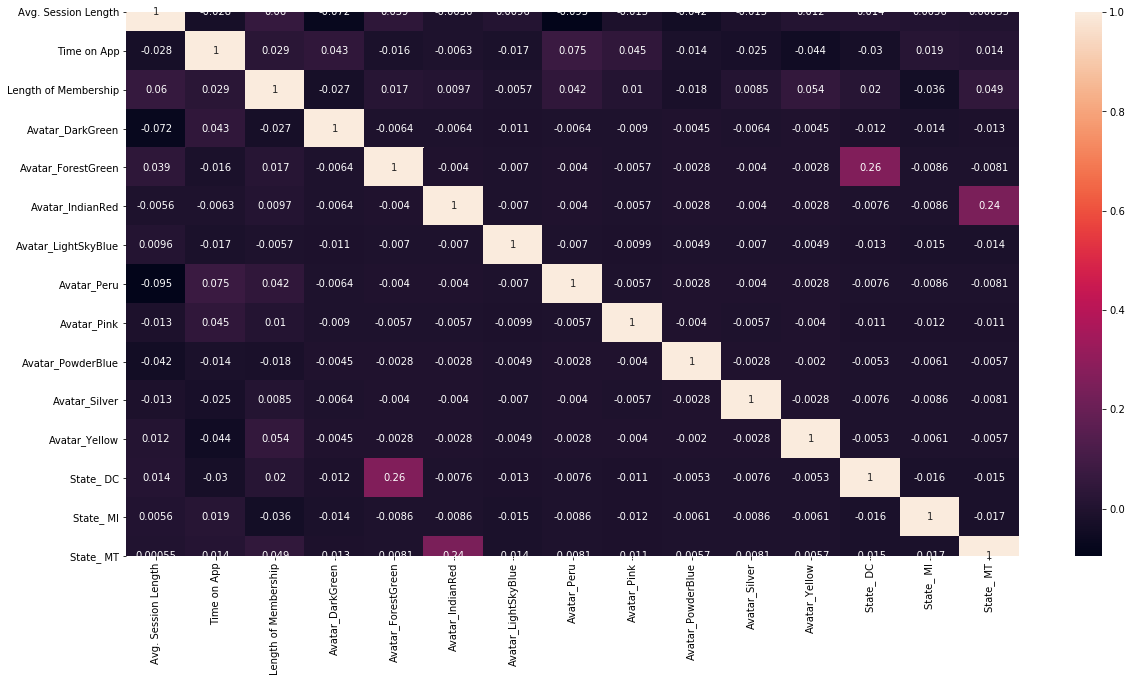

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(Xselect.drop(columns='const').corr(),annot=True)
plt.show()

In [147]:
##From above itself, we can see that multi-collinearity does not exist among these variables: Still let's check
#the VIF

In [148]:
###Ideally, we desire a high Rsquare and low RMSE: But of course, the Rsquare should not be so high that it shows Overfitting
#So, we need to check for a model which has high Rsquare and low RMSE

In [149]:
##Let's create a model: using Xselect

import statsmodels.api as sm
def model(df):
    y = df['Yearly Amount Spent']
    x = Xselect
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model1 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model1.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model1.rsquared
    r2_adjtrain = model1.rsquared_adj
    model2 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model2.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model2.rsquared
    r2_adjtest = model2.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Shape','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
model(df2)

,Train,Test
Dataset_Shape,"(350, 16)","(150, 16)"
RMSE,9.10146,9.19493
Rsquared,0.986773,0.986522
RSquared-Adjusted,0.986179,0.985448


In [150]:
##Let's us consider Polynomial Features now:To model using Interaction of the variables as well

In [151]:
df2.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avatar_AntiqueWhite,Avatar_Aqua,Avatar_Aquamarine,Avatar_Azure,Avatar_Beige,...,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,State_USC,State_USN,State_USS,State_Uni
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
from sklearn.preprocessing import PolynomialFeatures

X1 = X.drop('const',axis=1)
pf = PolynomialFeatures()
Xp1 = pf.fit_transform(X1)
cols = pf.get_feature_names(X1.columns)
Xp = pd.DataFrame(Xp1,columns=cols)

In [153]:
##AS we can know that modelling using All the Polynomial features will not give us good results. WE don't want to burden the
#model with so much data that it can't process. And ultimately this will cause overfitting(if we build model using all the
#features created above). So, we will select certain feature(important ones)
##Let us select the important features out these created Polynomial Features

In [155]:
#Backward Elimination to select features out of the Polynomial Features:
ys = list(y)
cols = list(Xp.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = Xp[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(ys,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(len(selected_features_BE))

['1', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Avatar_AntiqueWhite', 'Avatar_Aqua', 'Avatar_Aquamarine', 'Avatar_Azure', 'Avatar_Beige', 'Avatar_Bisque', 'Avatar_Black', 'Avatar_BlanchedAlmond', 'Avatar_Blue', 'Avatar_BlueViolet', 'Avatar_Brown', 'Avatar_BurlyWood', 'Avatar_CadetBlue', 'Avatar_Chartreuse', 'Avatar_Chocolate', 'Avatar_Coral', 'Avatar_CornflowerBlue', 'Avatar_Cornsilk', 'Avatar_Crimson', 'Avatar_Cyan', 'Avatar_DarkBlue', 'Avatar_DarkCyan', 'Avatar_DarkGoldenRod', 'Avatar_DarkGray', 'Avatar_DarkGreen', 'Avatar_DarkKhaki', 'Avatar_DarkMagenta', 'Avatar_DarkOliveGreen', 'Avatar_DarkOrange', 'Avatar_DarkOrchid', 'Avatar_DarkRed', 'Avatar_DarkSalmon', 'Avatar_DarkSeaGreen', 'Avatar_DarkSlateBlue', 'Avatar_DarkSlateGray', 'Avatar_DarkTurquoise', 'Avatar_DarkViolet', 'Avatar_DeepPink', 'Avatar_DeepSkyBlue', 'Avatar_DimGray', 'Avatar_DodgerBlue', 'Avatar_FireBrick', 'Avatar_FloralWhite', 'Avatar_ForestGreen', 'Avatar_Fuchsia', 'Avatar_Gai

In [ ]:
##Again, we see that 20706 features were selected here, and we don't need so many features as we don't want to burden our data
#so, we can try to find out polynomial functions from the Xselect which we got above, by selecting the features through
#backward elimination

In [156]:
Xselect.head()

,const,Avg. Session Length,Time on App,Length of Membership,Avatar_DarkGreen,Avatar_ForestGreen,Avatar_IndianRed,Avatar_LightSkyBlue,Avatar_Peru,Avatar_Pink,Avatar_PowderBlue,Avatar_Silver,Avatar_Yellow,State_ DC,State_ MI,State_ MT
0,1.0,34.497268,12.655651,4.082621,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,31.926272,11.109461,2.664034,1,0,0,0,0,0,0,0,0,0,0,0
2,1.0,33.000915,11.330278,4.104543,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,34.305557,13.717514,3.120179,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,33.330673,12.795189,4.446308,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
from sklearn.preprocessing import PolynomialFeatures

X1 = Xselect.drop('const',axis=1)
pf = PolynomialFeatures()
Xp1 = pf.fit_transform(X1)
cols = pf.get_feature_names(X1.columns)
Xp = pd.DataFrame(Xp1,columns=cols)

In [158]:
#Backward Elimination to select features out of the Polynomial Features:
ys = list(y)
cols = list(Xp.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = Xp[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(ys,X_1).fit()
    p = pd.Series(model.pvalues.values,index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(len(selected_features_BE))

['1', 'Avg. Session Length', 'Time on App', 'Length of Membership', 'Avatar_PowderBlue', 'Avatar_Yellow', 'State_ DC', 'State_ MI', 'Avg. Session Length Avatar_DarkGreen', 'Avg. Session Length Avatar_LightSkyBlue', 'Avg. Session Length Avatar_PowderBlue', 'Avg. Session Length Avatar_Yellow', 'Avg. Session Length State_ MT', 'Time on App Avatar_ForestGreen', 'Time on App Avatar_IndianRed', 'Time on App Avatar_Pink', 'Time on App Avatar_PowderBlue', 'Time on App Avatar_Yellow', 'Length of Membership Avatar_Peru', 'Length of Membership Avatar_PowderBlue', 'Length of Membership Avatar_Silver', 'Length of Membership Avatar_Yellow', 'Length of Membership State_ MT', 'Avatar_DarkGreen Avatar_ForestGreen', 'Avatar_DarkGreen Avatar_IndianRed', 'Avatar_DarkGreen Avatar_LightSkyBlue', 'Avatar_DarkGreen Avatar_Peru', 'Avatar_DarkGreen Avatar_Pink', 'Avatar_DarkGreen Avatar_PowderBlue', 'Avatar_DarkGreen Avatar_Silver', 'Avatar_DarkGreen Avatar_Yellow', 'Avatar_DarkGreen State_ DC', 'Avatar_DarkGre

In [159]:
##91 seems like an okay number for features: so let's proceed with these features

In [161]:
Xs = Xp.loc[:,selected_features_BE]

In [162]:
Xs

,1,Avg. Session Length,Time on App,Length of Membership,Avatar_PowderBlue,Avatar_Yellow,State_ DC,State_ MI,Avg. Session Length Avatar_DarkGreen,Avg. Session Length Avatar_LightSkyBlue,...,Avatar_Silver State_ MT,Avatar_Yellow^2,Avatar_Yellow State_ DC,Avatar_Yellow State_ MI,Avatar_Yellow State_ MT,State_ DC^2,State_ DC State_ MI,State_ DC State_ MT,State_ MI^2,State_ MI State_ MT
0,1.0,34.497268,12.655651,4.082621,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,31.926272,11.109461,2.664034,0.0,0.0,0.0,0.0,31.926272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,33.000915,11.330278,4.104543,0.0,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,34.305557,13.717514,3.120179,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,33.330673,12.795189,4.446308,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,33.237660,13.566160,3.746573,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,1.0,34.702529,11.695736,3.576526,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,1.0,32.646777,11.499409,4.958264,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,1.0,33.322501,12.391423,2.336485,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
#Model using selected features
ols = sm.OLS(ys,Xs).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2228.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:09:55   Log-Likelihood:                -1817.0
No. Observations:                 500   AIC:                             3668.
Df Residuals:                     483   BIC:                             3740.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
1                                       -1039.1494     15.011    -69.224      0.000   -1068.645   -1009.653
Avg. Session Length                        25.8748      0.425     60.925      0.000      25.040      26.709
Time on App                                38.6257      0.424     91.187      0.000      37.793      39.458
Length of Membership                       61.4172      0.422    145.599      0.000      60.588      62.246
Avatar_PowderBlue                           0.0169      0.008      2.132      0.034       0.001       0.032
Avatar_Yellow                               0.0153      0.007      2.060      0.040       0.001       0.030
State_ DC                                  -5.5804      1.837     -3.037      0.003      -9.190      -1.970
State_ MI                                   3.8953      1.570      2.481      0.013       0.810       6.981
Avg. Session Length Avatar_DarkGreen        0.2994      0.130      2.301      0.022       0.044       0.555
Avg. Session Length Avatar_LightSkyBlue     0.3265      0.116      2.825      0.005       0.099       0.554
Avg. Session Length Avatar_PowderBlue       0.5416      0.254      2.132      0.034       0.042       1.041
Avg. Session Length Avatar_Yellow           0.5107      0.248      2.060      0.040       0.024       0.998
Avg. Session Length State_ MT              -1.7380      0.873     -1.991      0.047      -3.453      -0.023
Time on App Avatar_ForestGreen              1.8711      0.579      3.230      0.001       0.733       3.009
Time on App Avatar_IndianRed               -2.3177      0.600     -3.863      0.000      -3.497      -1.139
Time on App Avatar_Pink                     1.3323      0.373      3.573      0.000       0.600       2.065
Time on App Avatar_PowderBlue               0.1978      0.093      2.132      0.034       0.016       0.380
Time on App Avatar_Yellow                   0.1699      0.082      2.060      0.040       0.008       0.332
Length of Membership Avatar_Peru            3.8720      1.555      2.490      0.013       0.817       6.928
Length of Membership Avatar_PowderBlue      0.0529      0.025      2.132      0.034       0.004       0.102
Length of Membership Avatar_Silver          4.0326      1.798      2.243      0.025       0.500       7.565
Length of Membership Avatar_Yellow          0.0727      0.035      2.060      0.040       0.003       0.142
Length of Membership State_ MT             16.9389      7.383      2.294      0.022       2.431      31.447
Avatar_DarkGreen Avatar_ForestGreen              0          0        nan        nan           0           0
Avatar_DarkGreen Avatar_IndianRed                0          0        nan        nan           0           0
Avatar_DarkGreen Avatar_LightSkyBlue             0         

In [ ]:
##again, we see so many nan values in the summary(even in the Pvalues) and this is not desired, since we want to understand
#how and by how much strength are the independant variables important.
##so we can now try building a machine learning model and we can tune it to find the perfect one

In [164]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=1)

In [165]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
result = lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [167]:
y_test_pred

array([497.97533128, 518.73854755, 562.31001978, 477.63591898,
       424.37354996, 520.08898714, 477.56769993, 426.35407368,
       517.93286393, 436.7185248 , 487.54276102, 528.60962785,
       576.61766563, 552.92656209, 686.18830613, 471.15123962,
       316.07340028, 459.6727692 , 453.61869162, 458.7936548 ,
       456.11222246, 327.35832601, 503.56859721, 401.25703313,
       772.67449715, 429.89942814, 512.7116812 , 490.203393  ,
       304.97811758, 588.8996177 , 503.61875879, 387.76876851,
       463.08864957, 322.3653104 , 465.03991073, 549.5993673 ,
       620.48402901, 590.77569479, 494.49706108, 403.74508143,
       506.00834044, 566.41917896, 422.90589178, 561.53879949,
       442.56914412, 432.16351683, 428.1665141 , 505.9281777 ,
       370.38145947, 400.44256135, 551.70386118, 350.45019128,
       638.20736569, 477.94612576, 450.10522731, 622.09648688,
       325.34529524, 489.91113582, 409.20665042, 547.93019282,
       585.93552319, 549.47085138, 564.72051815, 588.74

In [168]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9862340884791665

In [169]:
r2_score(y_train,y_train_pred)

0.985748996822298

In [170]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_test_pred))

9.825294877232364

In [171]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

9.212569678306448

In [172]:
##We will use RFE to reduce over-fitting and the number of variables:

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold

In [173]:
params = [{'n_features_to_select':list(range(1,60))}]
lr = LinearRegression()
rfe = RFE(lr)

folds = KFold(n_splits=3,random_state=1)
model_cv = GridSearchCV(rfe,param_grid=params,cv=folds)
model_cv.fit(Xp,y)


GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [174]:
model_cv.best_params_

{'n_features_to_select': 8}

In [175]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=1)

rfe.fit(Xp,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [176]:
cols = pd.DataFrame(list(zip(Xp.columns,rfe.support_,rfe.ranking_)),columns=['cols','select','rank'])
cols.sort_values(by='rank').head(8)

,cols,select,rank
3,Length of Membership,True,1
2,Time on App,False,2
1,Avg. Session Length,False,3
108,Avatar_Pink^2,False,4
58,Avatar_DarkGreen^2,False,5
4,Avatar_DarkGreen,False,6
46,Length of Membership Avatar_DarkGreen,False,7
90,Avatar_IndianRed State_ MT,False,8


In [177]:
a = list(cols.sort_values(by='rank').head(8)['cols'])

In [178]:
Xp[a]

,Length of Membership,Time on App,Avg. Session Length,Avatar_Pink^2,Avatar_DarkGreen^2,Avatar_DarkGreen,Length of Membership Avatar_DarkGreen,Avatar_IndianRed State_ MT
0,4.082621,12.655651,34.497268,0.0,0.0,0.0,0.000000,0.0
1,2.664034,11.109461,31.926272,0.0,1.0,1.0,2.664034,0.0
2,4.104543,11.330278,33.000915,0.0,0.0,0.0,0.000000,0.0
3,3.120179,13.717514,34.305557,0.0,0.0,0.0,0.000000,0.0
4,4.446308,12.795189,33.330673,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
495,3.746573,13.566160,33.237660,0.0,0.0,0.0,0.000000,0.0
496,3.576526,11.695736,34.702529,0.0,0.0,0.0,0.000000,0.0
497,4.958264,11.499409,32.646777,0.0,0.0,0.0,0.000000,0.0
498,2.336485,12.391423,33.322501,0.0,0.0,0.0,0.000000,0.0


In [179]:
##Now building model with 8 top features(n features to select was 8)
Xp1 = Xp[a]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(Xp1, y, test_size=0.3, random_state=1)

In [181]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
result = lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [183]:
y_test_pred

array([498.76754648, 518.91204654, 562.75085722, 478.83180484,
       423.41515481, 527.46506055, 478.74484356, 460.4194642 ,
       519.31612712, 438.45494794, 487.76384827, 525.8288129 ,
       576.75453762, 553.72302704, 685.08887438, 472.6677941 ,
       314.71992443, 457.72681697, 452.64289866, 460.56438349,
       456.9375943 , 331.75173662, 504.28528502, 401.51558205,
       765.8667187 , 425.49216571, 513.49460286, 476.90654699,
       306.40502204, 590.21911557, 504.79570975, 389.90790622,
       463.33247448, 316.62034712, 465.70144307, 549.69093452,
       619.39379087, 591.38859607, 495.73769529, 402.06362419,
       506.53463095, 547.25018482, 422.80896912, 558.90591289,
       441.35456408, 432.7487647 , 429.94717378, 506.79768101,
       425.80577573, 401.69880233, 552.68093509, 353.26714617,
       639.94818511, 478.77466686, 451.56391551, 620.72604453,
       325.83619551, 490.99489876, 411.08573209, 548.7579244 ,
       587.53619747, 547.90621743, 568.1454949 , 588.10

In [184]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9883269083622762

In [185]:
r2_score(y_train,y_train_pred)

0.9829704093163544

In [186]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_test_pred))

9.047655455715873

In [187]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

10.070711899210005

In [188]:
##WE see that on selecting the top 8 features, the RMSE for the test decreases and the train increases here
##So, in this case let's consider if the Test RMSE was to be of utmost importance, then we would consider this model
#since the RMSE has decreased and the Rsquare has also increased(which is good unless it is not overfitting)

In [213]:
##Building statistical model using Selected variables:
ols = sm.OLS(ys,Xp1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.928e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:42:42   Log-Likelihood:                         -2418.4
No. Observations:                 500   AIC:                                      4851.
Df Residuals:                     493   BIC:                                      4880.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Length of Membership                     60.6289      1.382     43.884      0.000      57.914      63.343
Time on App                              28.1578      1.295     21.751      0.000      25.614      30.701
Avg. Session Length                      -1.6199      0.489     -3.312      0.001      -2.581      -0.659
Avatar_Pink^2                            16.3557     15.440      1.059      0.290     -13.981      46.692
Avatar_DarkGreen^2                       16.5964     53.117      0.312      0.755     -87.768     120.961
Avatar_DarkGreen                         16.5964     53.117      0.312      0.755     -87.768     120.961
Length of Membership Avatar_DarkGreen   -12.3924     32.302     -0.384      0.701     -75.858      51.074
Avatar_IndianRed State_ MT                1.7261     30.782      0.056      0.955     -58.754      62.207
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.759
Skew:                          -0.061   Prob(JB):                        0.684
Kurtosis:                       2.853   Cond. No.                     2.95e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [214]:
import statsmodels.api as sm
def model(df):
    y = df['Yearly Amount Spent']
    x = Xp1
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model1 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model1.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model1.rsquared
    r2_adjtrain = model1.rsquared_adj
    model2 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model2.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model2.rsquared
    r2_adjtest = model2.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Shape','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
model(df2)

,Train,Test
Dataset_Shape,"(350, 9)","(150, 9)"
RMSE,9.79727,9.56287
Rsquared,0.984674,0.985422
RSquared-Adjusted,0.984405,0.98481


In [ ]:
##THE above model is the one which I have selected for final analysis. Please read more about it in the summary in last
#question

In [ ]:
##We can try using Regularization technique on the above defined Xp such as LassoCV as well:
##To visualize the importance of features we can try Lasso

In [189]:
Xp.head()

,1,Avg. Session Length,Time on App,Length of Membership,Avatar_DarkGreen,Avatar_ForestGreen,Avatar_IndianRed,Avatar_LightSkyBlue,Avatar_Peru,Avatar_Pink,...,Avatar_Yellow^2,Avatar_Yellow State_ DC,Avatar_Yellow State_ MI,Avatar_Yellow State_ MT,State_ DC^2,State_ DC State_ MI,State_ DC State_ MT,State_ MI^2,State_ MI State_ MT,State_ MT^2
0,1.0,34.497268,12.655651,4.082621,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,31.926272,11.109461,2.664034,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,33.000915,11.330278,4.104543,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,34.305557,13.717514,3.120179,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,33.330673,12.795189,4.446308,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [193]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(Xp, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(Xp,y))
coef = pd.Series(reg.coef_, index = Xp.columns)

Best alpha using built-in LassoCV: 2.216160
Best score using built-in LassoCV: 0.984045


Text(0.5, 1.0, 'Feature importance using Lasso Model')

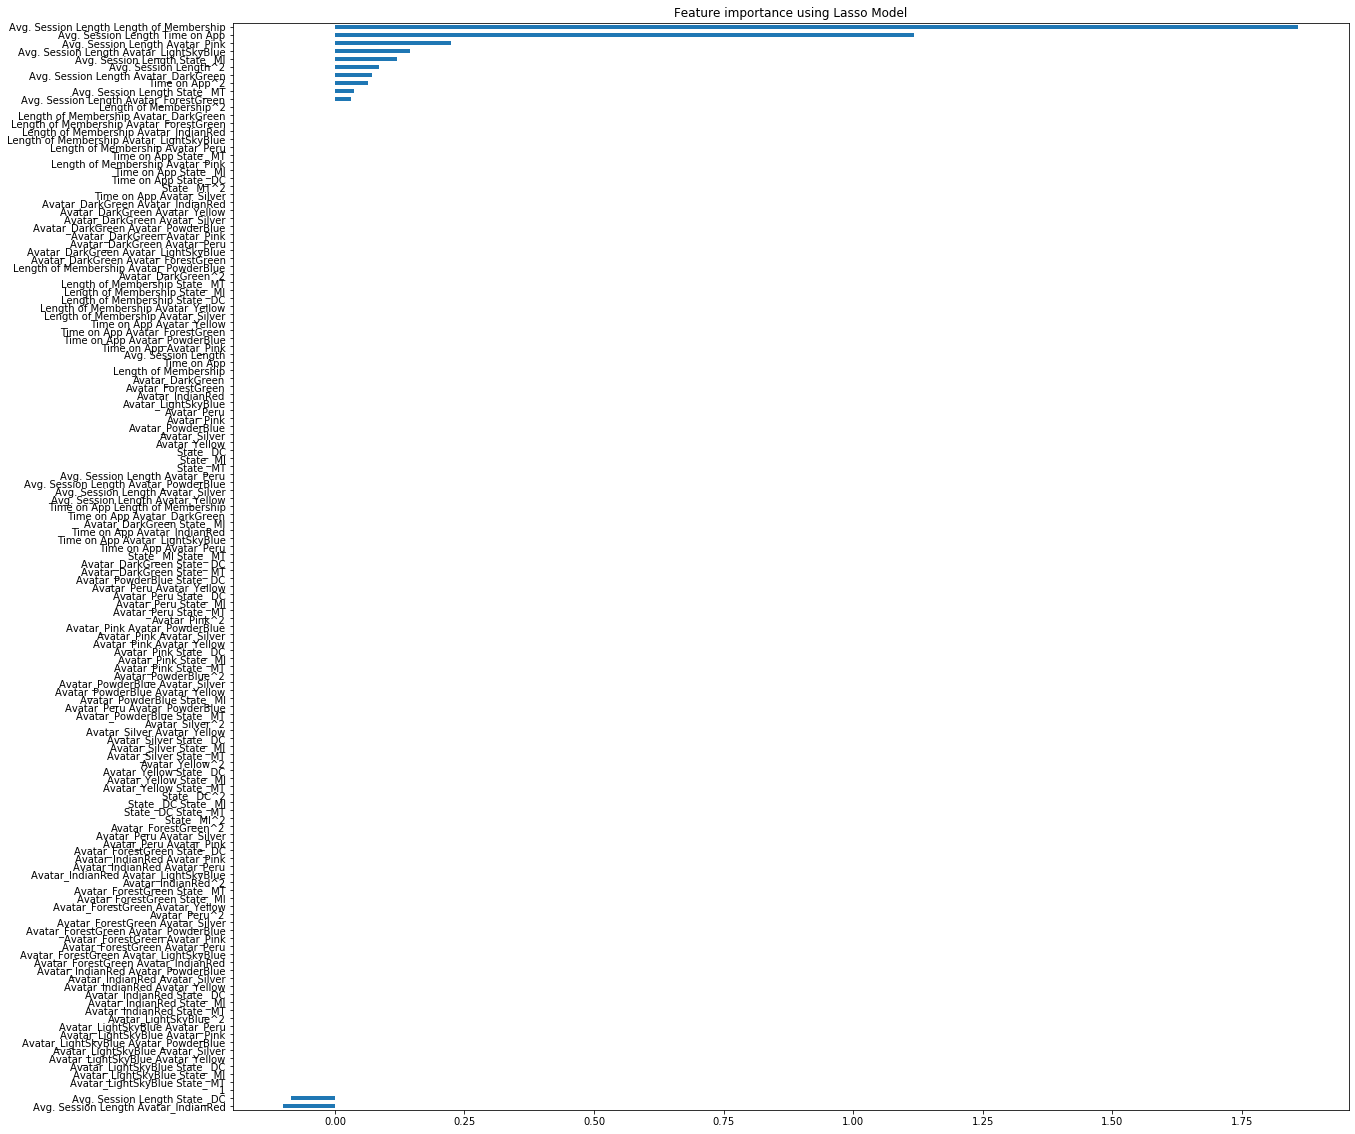

In [199]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 20)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [211]:
imp_coef

Avg. Session Length Avatar_IndianRed       -0.099610
Avg. Session Length State_ DC              -0.084958
1                                           0.000000
Avatar_LightSkyBlue State_ MT               0.000000
Avatar_LightSkyBlue State_ MI               0.000000
                                              ...   
Avg. Session Length State_ MI               0.119213
Avg. Session Length Avatar_LightSkyBlue     0.145505
Avg. Session Length Avatar_Pink             0.223024
Avg. Session Length Time on App             1.117809
Avg. Session Length Length of Membership    1.857941
Length: 136, dtype: float64

In [203]:
imp_coef.reset_index().sort_values(by=0).tail(2)

,index,0
134,Avg. Session Length Time on App,1.117809
135,Avg. Session Length Length of Membership,1.857941


In [209]:
imp_coef.reset_index().sort_values(by=0,ascending=False).head(10)

,index,0
135,Avg. Session Length Length of Membership,1.857941
134,Avg. Session Length Time on App,1.117809
133,Avg. Session Length Avatar_Pink,0.223024
132,Avg. Session Length Avatar_LightSkyBlue,0.145505
131,Avg. Session Length State_ MI,0.119213
130,Avg. Session Length^2,0.084357
129,Avg. Session Length Avatar_DarkGreen,0.070703
128,Time on App^2,0.063702
127,Avg. Session Length State_ MT,0.036464
126,Avg. Session Length Avatar_ForestGreen,0.031539


In [210]:
##We see the variables from Lasso that show importance(either positive or negative)

# SUMMARY


In [ ]:
##For summarizing, I have selected my final model to be the one with 8 final features(the model below which I wrote that I was
#going to explain more in the summary)
#For this model, first the significant features were selected from the original(initial) model, and then polynomial 
#features(for creatig features with interaction) were #created using the selected features. 
#Out of these polynomial features, we then selected the final 8 features #using which we build our selected model
##Out of these 8 select features, I have built both, the machine learning model and the statistical model
#For ML model:
#Test Rsquare:0.9883269083622762
#Test RMSE: 9.047655455715873

#for statistical model(Test)
#RMSE: 9.56287
#Rsquared:0.985422

#so, this statistical model(since we build statistical as initial model) has been selected as a good model because it 
#contains very less number of features as compares to other
#models that we build (and yet it gives a great Rsquare: which means that it explains the variance in the data extremely well)
#Also, as we have seen, this model shows an RMSE which is lower than a few of the other models and higher than a few of the
#other models, but it shows a good Rsquare 

# Possible Insights for the Business Stakeholders

Text(0.5, 1.0, 'Feature importance using Lasso Model')

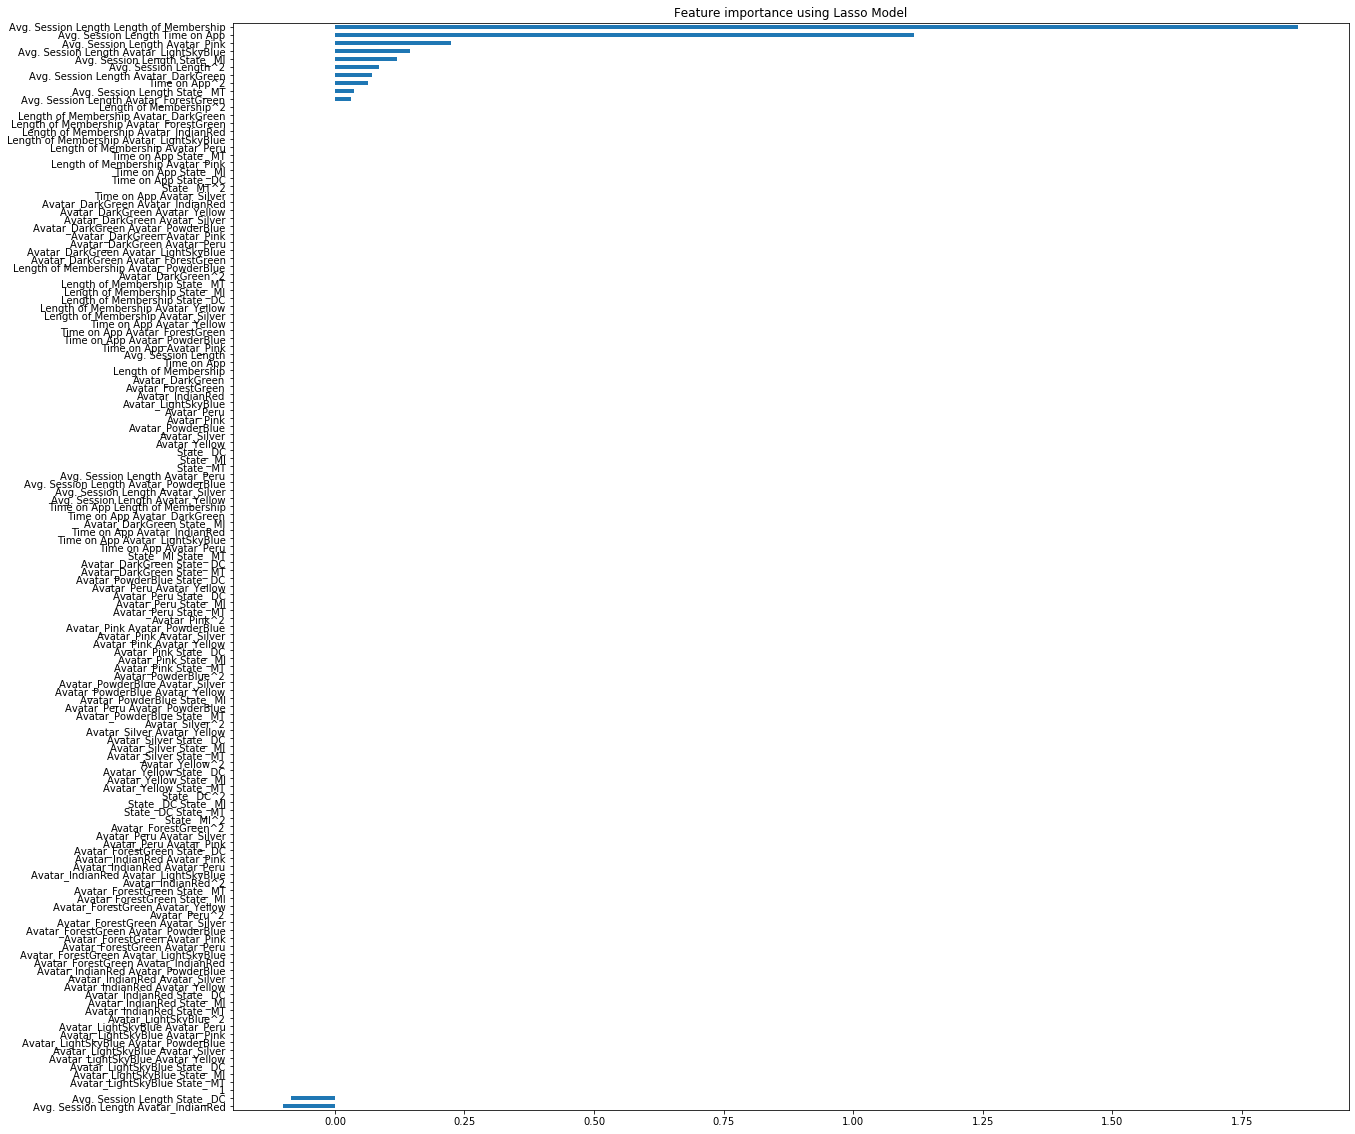

In [215]:
##Below we see variables that positively and negatively affect the total amount spend
#Please read business interpretation below:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 20)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [216]:
imp_coef.reset_index().sort_values(by=0).tail(2) ##Variables negatively affecting amount spent and the interaction of 
#these variables negatively affecting amount spent(increase in these variables will decrease amount spend)

,index,0
134,Avg. Session Length Time on App,1.117809
135,Avg. Session Length Length of Membership,1.857941


In [217]:
imp_coef.reset_index().sort_values(by=0,ascending=False).head(10) ##Variables positively affecting amount spent,and
#the interaction of these variables positively affecting amount spent(increase in these variables will increase amount spent)

,index,0
135,Avg. Session Length Length of Membership,1.857941
134,Avg. Session Length Time on App,1.117809
133,Avg. Session Length Avatar_Pink,0.223024
132,Avg. Session Length Avatar_LightSkyBlue,0.145505
131,Avg. Session Length State_ MI,0.119213
130,Avg. Session Length^2,0.084357
129,Avg. Session Length Avatar_DarkGreen,0.070703
128,Time on App^2,0.063702
127,Avg. Session Length State_ MT,0.036464
126,Avg. Session Length Avatar_ForestGreen,0.031539


# How the base model was improved.

In [ ]:
##Most effect was done by Feature Selection and then Creating Polynomial Features

#For this model, first the significant features were selected from the original(initial) model, and then polynomial 
#features(for creatig features with interaction) were #created using the selected features. 
#Out of these polynomial features, we then selected the final 8 features #using which we build our selected model

# End Notes

In [ ]:
##RMSE and Rsquare have to be kept in mind at all times. My model does have a very high Rsquare which could mean that it is 
#still over fitting and then again there was another model with a lower RMSE but that model was
#not explaining the importance and interaction of the variables properly, which is why I chose this model as my final model

##Another risk could be that, is some other model/case, these variables would not have been of the same importance, and 
#the immportance of the features does not neccessaily depend on the model, but of course it does depend on how the model
#was formed in the first place(using which variables, using which techniques): all that is very important to finally
#interpret which variables would make a difference while writing the business interpretation